<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - Bootcamp Course Fall 2020

## Important  - Assignment Guidelines

1. Before you turn in your assignment, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. In the cells below you will replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run properly.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **IMPORTANT: DO NOT RENAME THIS NOTEBOOK!** If the file name changes, the autograder will not grade your assignment properly.
5. **Do not rename the notebook file.** If you do, the autograder will not recognize your submisson.
6. When you plot, please comment out `plt.show()` as the code below will effectively run `plt.show()` for you and also will grab your plot for autograding. DO NOT DELETE any code that says `DO NOT REMOVE LINE BELOW`. That code is for autograding!!

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Mike Petrut**

<img style="float: left;" src="colored-bar.png"/>

---

# Homework 11 Template - Lidar & Raster Data

## About the 2013 Colorado Floods

If you haven't already, review the following chapters in the Intermediate Earth Data Science
online textbook:

* https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/what-is-lidar-data/
* https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/colorado-floods-2013/ 
* https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/


### Assignment Data

You can download the data from **earthpy** using the following syntax:

`et.data.get_data("colorado-flood")`

Using the data from the directory as follows:

In the `colorado-flood/spatial/boulder-leehill-rd/` you will see two directories - pre and post flood. Each of these directories contains a lidar sub directory that has a `DTM.tif` and a `DSM.tif` file. You will use these files to create your lidar Canopy Height Model (CHM). 


In [1]:
# Imports for autograding - do not edit!
import matplotcheck.base as mpc
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.raster as ra

<img style="float: left;" src="colored-bar.png"/>

##  Colorado Flood Data: Quantify Ecological Change Using Remote Sensing Derived Data

This week you will explore data that quantifies conditions before and after the Colorado 
Flood event which occured in 2013. You will use digital surface and terrain (elevation) 
models created using lidar data collected before and after the flood by NEON (National
Ecological Observatory Network). 

The NEON data were collected shortly before the flood event and then again after. 
In your analysis below, you will look at change associated with the before and 
after data and will quantify that change using different descriptive plots
including histograms and classified raster plots.

To begin, in the cell below add any python imports needed to complete this assignment.
Do not add imports that are not used in this notebook!

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
from shapely.geometry import mapping

import seaborn as sns

sns.set(font_scale=1.3)
sns.set_style("white")


In [3]:
# Test package imports - DO NOT MODIFY THIS CELL!

try:
    crs = rxr
    print("\u2705 Score! rioxarray has been imported as a rxr!")
except NameError:
    print("\u274C rioxarray has not been imported as a rxr, please make sure to import is properly.")

try:
    empty_array = xr
    print("\u2705 Score! xarray has been imported as a xr!")
except NameError:
    print("\u274C xarray has not been imported as a xr, please make sure to import is properly.")

try:
    mapping_func = mapping
    print("\u2705 Score! Mapping has been imported from shapely.geometry!")
except NameError:
    print("\u274C Mapping has notbeen imported from shapely.geometryy. You need mapping to clip your data.")



✅ Score! rioxarray has been imported as a rxr!
✅ Score! xarray has been imported as a xr!
✅ Score! Mapping has been imported from shapely.geometry!


## Set Working Directory and Download Data

In the cell below complete the following task:

1. First, use **EarthPy** to download the `colorado-flood` data: `et.data.get_data("colorado-flood")`. When you download the data, the `earth-analytics/data` directory gets created on your computer for you.
2. **Use a conditional statement** to:
    * Set the working directory to the **`earth-analytics/data` directory in your home directory** if the path exists.
    * Print a helpful message if the path does not exist. 
* **Use reusable variable(s) to reduce repetition in your code.**
* Use the `os` package to ensure that the paths you create will run successfully on any operating system.


In [4]:
# Get data
et.data.get_data("colorado-flood")

#Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [5]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

wd_points = 0

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
    wd_points += 5
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

print("\n \u27A1 You received {} out of 5 points for setting your working directory.".format(
    wd_points))
wd_points

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data

 ➡ You received 5 out of 5 points for setting your working directory.


5

## Challenge 1 - Create a Pre Flood Canopy Height Model (CHM) 

Create a cropped raster map that shows positive and negative change in the 
canopy height model before compared to after the flood. To do this:

* Create a Canopy Height Model using the pre and post lidar DSM (Digital Surface Model) and DTM (Digital Terrain Model) files 
* Subtract the pre-flood CHM from the post-flood CHM: (`post_flood_CHM - pre_flood_CHM`).
* Crop the data using the **data/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp** shapefile.

NOTES: 
* I am asking you to subtract the pre-conditions from the post conditions to ensure 
that your negative values  represent loss of terrain. This will be easier for you to 
explain in your writeup.
* You will learn more about shapefile data in next week's class.

At the end of the cell, call the xarray object that contains the CHM data that you
created.

In [6]:
#Define path to all data

data_path = os.path.join("colorado-flood",
                         "spatial",
                         "boulder-leehill-rd")

#Define path to terrain model data
pre_dtm_path = os.path.join(data_path,
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

#Define path to surface model data
pre_dsm_path = os.path.join(data_path,
                            "pre-flood",
                            "lidar",
                            "pre_DSM.tif")

#Import pre-flood surface model data as raster files
lidar_dtm_pre = rxr.open_rasterio(pre_dtm_path, masked = True).squeeze() 
lidar_dsm_pre = rxr.open_rasterio(pre_dsm_path, masked = True).squeeze() 

#Subtract the dtm from the DSM to create a CHM
lidar_chm_pre = lidar_dsm_pre - lidar_dtm_pre

#Define path to the clip shapefile
clip_extent_path = os.path.join(data_path,
                                "clip-extent.shp")

#Import and assign the shapefile
crop_extent = gpd.read_file(clip_extent_path)

#Clip the item
pre_chm_clip = lidar_chm_pre.rio.clip(crop_extent.geometry.apply(mapping),
                                      crop_extent.crs)
#Call the item
pre_chm_clip

<xarray.DataArray (y: 2000, x: 3490)>
array([[3.72009277, 7.04992676, 7.40002441, ..., 0.        , 0.17004395,
        0.96008301],
       [2.23010254, 2.16992188, 2.15002441, ..., 0.        , 0.09008789,
        1.64001465],
       [7.04003906, 7.47998047, 7.5       , ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [5.56005859, 5.20996094, 5.67993164, ..., 0.        , 0.        ,
        0.        ],
       [3.93005371, 5.70996094, 6.31994629, ..., 0.        , 0.        ,
        0.        ],
       [2.85998535, 5.51000977, 5.51000977, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
    band         int32 1
    spatial_ref  int32 0
Attributes:
    grid_mapping:  spatial_ref

In [7]:
# DO NOT MODIFY THIS CELL
# Visible tests for your array

student_pre_chm_xr = _
student_pre_chm_points_visible = 0

if isinstance(student_pre_chm_xr, xr.DataArray):
    print("\u2705 Great job! Your data are stored in a DataArray!")
    student_pre_chm_points_visible += 2
else:
    print("\u274C Oops, the data are not stored in a DataArray.")

if student_pre_chm_xr.min().values.item() == 0:
    print("\u2705 The minimum value in your DataArray is correct!")
    student_pre_chm_points_visible += 1
else:
    print("\u274C The minimum value in your DataArray is incorrect.")

if round(student_pre_chm_xr.max().values.item(), 4) == 26.9301:
    print("\u2705 The maximum value in your DataArray is correct!")
    student_pre_chm_points_visible += 1
else:
    print("\u274C The maximum value in your DataArray is incorrect.")

if student_pre_chm_xr.rio.bounds() == (472510.0, 4434000.0, 476000.0, 4436000.0):
    student_pre_chm_points_visible += 1
    print("\u2705 Data are cropped properly, good job!")
else:
    print("\u274C The data are not cropped properly.")

print("\n \u27A1 You received {} out of 5 points for the modified xarray.".format(
    student_pre_chm_points_visible))
student_pre_chm_points_visible

✅ Great job! Your data are stored in a DataArray!
✅ The minimum value in your DataArray is correct!
✅ The maximum value in your DataArray is correct!
✅ Data are cropped properly, good job!

 ➡ You received 5 out of 5 points for the modified xarray.


5

In [8]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 2 - Create a Post Flood CHM

Create a Canopy Height model using the lidar post flood data. Use the same
crop_extent data that you used for the pre-flood data to clip your data.


Call your chm array object at the end of the cell.

In [9]:
#Define path to all data

data_path = os.path.join("colorado-flood",
                         "spatial",
                         "boulder-leehill-rd")

#Define path to terrain model data
post_dtm_path = os.path.join(data_path,
                             "post-flood",
                             "lidar",
                             "post_DTM.tif")

#Define path to surface model data
post_dsm_path = os.path.join(data_path,
                             "post-flood",
                             "lidar",
                             "post_DSM.tif")

#Import pre-flood surface model data as raster files
lidar_dtm_post = rxr.open_rasterio(post_dtm_path, masked = True).squeeze() 
lidar_dsm_post = rxr.open_rasterio(post_dsm_path, masked = True).squeeze() 

#Subtract the dtm from the DSM to create a CHM
lidar_chm_post = lidar_dsm_post - lidar_dtm_post

#Define path to the clip shapefile
clip_extent_path = os.path.join(data_path,
                                "clip-extent.shp")

#Import and assign the shapefile
crop_extent = gpd.read_file(clip_extent_path)

#Clip the item
post_chm_clip = lidar_chm_post.rio.clip(crop_extent.geometry.apply(mapping),
                                        crop_extent.crs)

#Call the item
post_chm_clip

<xarray.DataArray (y: 2000, x: 3490)>
array([[3.72009277, 8.43994141, 9.70996094, ..., 0.        , 0.        ,
        0.98010254],
       [3.54992676, 7.51000977, 9.94995117, ..., 0.        , 0.        ,
        1.40002441],
       [2.98010254, 4.40002441, 4.56005859, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [5.2199707 , 4.32006836, 5.36010742, ..., 0.        , 0.        ,
        0.        ],
       [2.47009277, 4.88000488, 4.32995605, ..., 0.        , 0.        ,
        0.        ],
       [0.32995605, 1.26000977, 6.58996582, ..., 0.        , 0.        ,
        0.        ]])
Coordinates:
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
    band         int32 1
    spatial_ref  int32 0
Attributes:
    grid_mapping:  spatial_ref

In [10]:
# DO NOT MODIFY THIS CELL
# Visible tests for your array

student_post_chm_xr = _
student_post_chm_points_visible = 0

if isinstance(student_post_chm_xr, xr.DataArray):
    print("\u2705 Great job! Your data are stored in a DataArray!")
    student_post_chm_points_visible += 2
else:
    print("\u274C Oops, the data are not stored in a DataArray.")

if student_post_chm_xr.min().values.item() == 0:
    print("\u2705 The minimum value in your DataArray is correct!")
    student_post_chm_points_visible += 1
else:
    print("\u274C The minimum value in your DataArray is incorrect.")

if round(student_post_chm_xr.max().values.item(), 4) == 27.4399:
    print("\u2705 The maximum value in your DataArray is correct!")
    student_post_chm_points_visible += 1
else:
    print("\u274C The maximum value in your DataArray is incorrect.")

if student_post_chm_xr.rio.bounds() == (472510.0, 4434000.0, 476000.0, 4436000.0):
    student_post_chm_points_visible += 1
    print("\u2705 Data was cropped properly, good job!")
else:
    print("\u274C The data was not cropped properly.")

print("\n \u27A1 You received {} out of 5 points for the post flood CHM.".format(
    student_post_chm_points_visible))
student_post_chm_points_visible

✅ Great job! Your data are stored in a DataArray!
✅ The minimum value in your DataArray is correct!
✅ The maximum value in your DataArray is correct!
✅ Data was cropped properly, good job!

 ➡ You received 5 out of 5 points for the post flood CHM.


5

In [11]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 3: Create and Plot a Difference pre/post CHM

Use the Pre and Post flood CHMs that you created above to create a DIFFERENCE 
xarray object that shows positive and negative change in the 
canopy height model before compared to after the flood. To do this:

* Subtract the pre-flood CHM from the post-flood CHM (`post_flood_CHM - pre_flood_CHM`).
* Plot your data as a raster image (not a histogram)

**HINT: In this raster plot and ALL raster plots in this notebook, remember to turn off the axis from displaying with `axes_name_here.set_axis_off()`.**

**NOTE: I am asking you to subtract the pre-conditions from the post conditions to ensure 
that your negative values  represent loss of terrain. This will be easier for you to 
explain in your writeup!**



In [12]:
# Calculate pre-flood canopy height model
post_chm = post_chm_clip - pre_chm_clip
post_chm

<xarray.DataArray (y: 2000, x: 3490)>
array([[ 0.        ,  1.39001465,  2.30993652, ...,  0.        ,
        -0.17004395,  0.02001953],
       [ 1.31982422,  5.34008789,  7.79992676, ...,  0.        ,
        -0.09008789, -0.23999023],
       [-4.05993652, -3.07995605, -2.93994141, ...,  0.        ,
         0.        , -0.07995605],
       ...,
       [-0.34008789, -0.88989258, -0.31982422, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45996094, -0.82995605, -1.98999023, ...,  0.        ,
         0.        ,  0.        ],
       [-2.5300293 , -4.25      ,  1.07995605, ...,  0.        ,
         0.        ,  0.        ]])
Coordinates:
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 4.725e+05 4.725e+05 4.725e+05 ... 4.76e+05 4.76e+05
    band         int32 1
    spatial_ref  int32 0

In [13]:
# DO NOT MODIFY THIS CELL
# Visible tests for your array

student_chm_diff = _
student_chm_diff_points = 0

if isinstance(student_chm_diff, xr.DataArray):
    print("\u2705 Great job! Your data are stored in a DataArray!")
    student_chm_diff_points += 2
else:
    print("\u274C Oops, the data are not stored in a DataArray.")

if round(student_chm_diff.min().values.item(), 4) == -23.4299:
    print("\u2705 The minimum value in your DataArray is correct!")
    student_chm_diff_points += 1
else:
    print("\u274C The minimum value in your DataArray is incorrect.")

if round(student_chm_diff.max().values.item(), 4) == 24.3301:
    print("\u2705 The maximum value in your DataArray is correct!")
    student_chm_diff_points += 1
else:
    print("\u274C The maximum value in your DataArray is incorrect.")

if student_chm_diff.rio.bounds() == (472510.0, 4434000.0, 476000.0, 4436000.0):
    student_chm_diff_points += 1
    print("\u2705 Data was cropped properly, good job!")
else:
    print("\u274C The data was not cropped properly.")

print("\n \u27A1 You received {} out of 5 points for the modified xarray.".format(
    student_chm_diff_points))
student_chm_diff_points

✅ Great job! Your data are stored in a DataArray!
✅ The minimum value in your DataArray is correct!
✅ The maximum value in your DataArray is correct!
✅ Data was cropped properly, good job!

 ➡ You received 5 out of 5 points for the modified xarray.


5

In [14]:
# DO NOT MODIFY THIS CELL

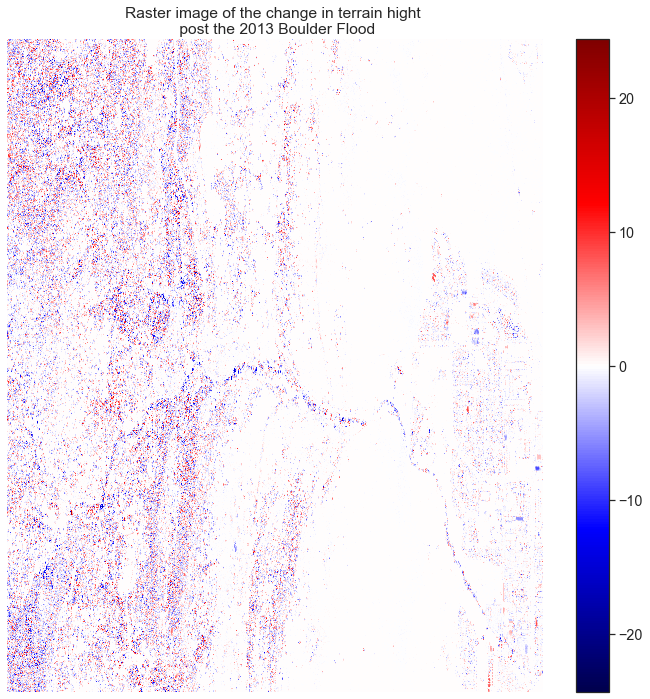

In [15]:
#Define color
plot_color = plt.cm.seismic
# Plot the data - chm data
f, ax = plt.subplots(figsize=(12, 12))
post_chm.plot(ax=ax,
              cmap = plot_color)
              
ax.set_axis_off()
ax.set(title="Raster image of the change in terrain hight \n post the 2013 Boulder Flood")
plt.show()

### Manual Grade Items - Challenge 3

* Plot title explains the plot.

In [16]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 4: Create a Histogram Plot Using Your Difference CHM

* In your histogram, set the bins parameter (`bins=`) to **30 bins**.
* Be sure to label your x and y axes and give your plot a useful title
* Modify the color of the bars

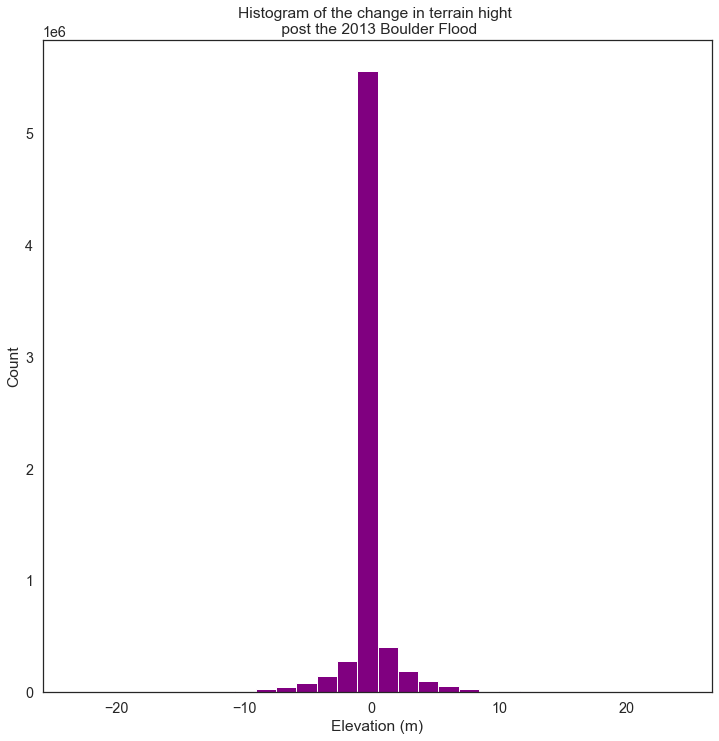

In [17]:
# Plot a histogram
f, ax = plt.subplots(figsize=(12, 12))

post_chm.plot.hist(ax=ax,
                  bins = 30, 
                  color = 'purple')

ax.set(xlabel="Elevation (m)",
       ylabel="Count",
       title="Histogram of the change in terrain hight \n post the 2013 Boulder Flood")

### DO NOT REMOVE LINE BELOW ###
plot02_chm_diff_hist = nb.convert_axes(plt, which_axes="current")

In [18]:
# DO NOT MODIFY THIS CELL
# Visible tests for hisogram to check it's a bar plot and has the correct amount of bins

hist_plot_2 = mpc.PlotTester(plot02_chm_diff_hist)

visible_results = []

plot_type_test = ag.run_test(hist_plot_2.assert_plot_type,
                             points=2,
                             plot_type='bar',
                             correct_message="\u2705 Your plot is a bar plot.",
                             error_message="\u274C Check your plot type to make sure it's a bar plot.")

plot_bins_test = ag.run_test(hist_plot_2.assert_num_bins,
                             points=2,
                             num_bins=30,
                             correct_message="\u2705 Your plot has the correct amount of bins.",
                             error_message="\u274C Check that your plot has the correct amount of bins.")

visible_results.extend([plot_type_test, plot_bins_test])

ag.output_results(visible_results)

Results for test 'assert_plot_type':
 Pass! ✅ Your plot is a bar plot. (2 points)
Results for test 'assert_num_bins':
 Pass! ✅ Your plot has the correct amount of bins. (2 points)


4

In [19]:
# DO NOT MODIFY THIS CELL

### Thought Question: CHM Difference Plot 
Answer the following questions using markdown in the cell below:

1. What does each bar in the CHM difference plot histogram plot above represent?
2. What does this histogram tell you about differences in the CHM and in the landscape before vs after the flood?
 

1. The change in elevation for each raster cell (pixel) from before and after the flood. The x axis is the meters of change and y axis is the count of observations
2. The majority of terrain observed was unchanged, slightly more observations of gained terrain are observed than declined terrain

<img style="float: left;" src="colored-bar.png"/>

## Challenge 5: Classified pre/post CHM difference Raster Plot 

In the cell below:

1. Classify your difference CHM using the bins specified below
2. Then create a raster plot of your data using xarray.
3. Add a legend to your plot with a legend entry for each of the three classes specified below.
4. Use a colormap that sets values around 0 (no change) to white or a light color. 


HINT: Consider using one of pythons diverging colormaps which has white or a lighter color as the "middle" color for this map.
* https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 

Use the following bins to classify your data:

* `< -1`
* `between -1 and 1` 
* `> 1`

your bins list will look like this: `[-np.inf, -1, 1, np.inf]`

Add a legend to your plot with the following categories:

* Loss
* No Change
* Gain

These categories should map to the bins that you used to classified the data.



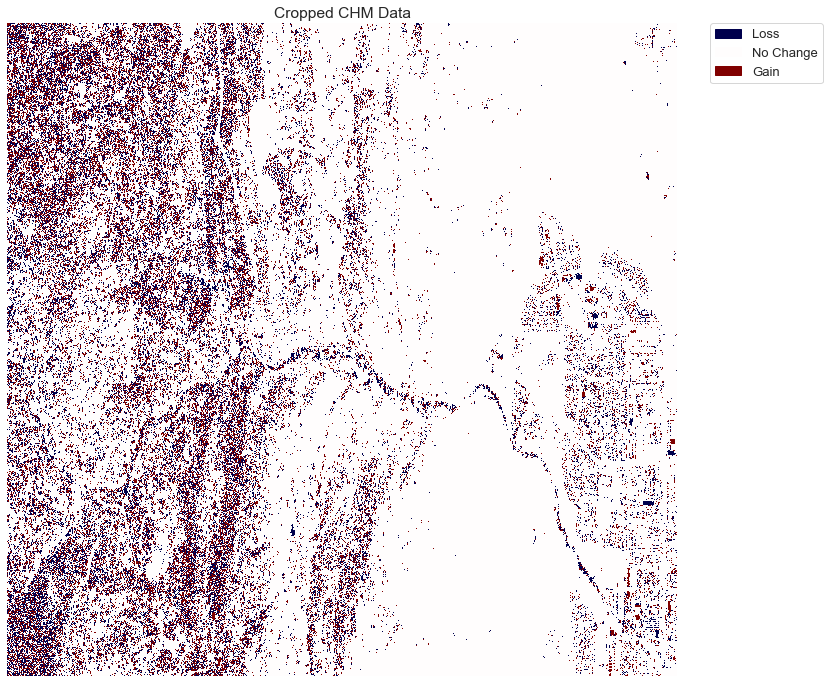

In [20]:
# IMPORTANT: Name your classified raster object diff_chm_class
# IMPORTANT: Do not use plt.show in this cell.

# YOUR CODE HERE

class_bins = [-np.inf, -1, 1, np.inf]
class_labels = ['Loss', 'No Change', 'Gain']

diff_chm_class = xr.apply_ufunc(np.digitize,
                                post_chm,
                                class_bins)

f, ax = plt.subplots(figsize=(12, 12))
# Turn off the default colorbar and add an earthpy legend
im = diff_chm_class.plot.imshow(add_colorbar=False, 
                                cmap = plot_color)

ep.draw_legend(im, 
               titles = class_labels)

# This line below turns off the ticks and black borders on your image

ax.set_axis_off()
ax.set(title="Cropped CHM Data")

### DO NOT REMOVE LINE BELOW ###
plot03_chm_diff_map = nb.convert_axes(plt, 
                                      which_axes="current")

In [21]:
# DO NOT MODIFY THIS CELL

YOUR ANSWER HERE

### Thought Question for Challenge Plot 5: CHM Difference Raster Plot (5 points)
* What patterns of erosion and deposition do you see in the raster plot above of chm difference?
Add your answer below using markdown 
*********


1.There appears to be erosion and disposition around the urban area to the right of the imagery, and also across most of the left side of the image where the valley appears to break into smaller streams on the other side of the canyons. Also it appears that disposition occurred locally, as there are no large groupings of gained or losses terrain, as the red and blue markers are scattered closely together

<img style="float: left;" src="colored-bar.png"/>

## Challenge 6: Plot of pre/post DTM & DSM Difference Raster Histogram 

Use the data that you opened and proceed above (the cropped DTM and DSM data before and after the flood)
to create a Figure with two subplots **stacked vertically**:

1. subplot 1: a histogram showing the difference (post - pre) in the digital terrain model
2. subplot 2: a histogram showing the difference (post - pre) in the digital surface model

For each subplot:

* Subtract the pre-flood DTM (or DSM) from the post-flood DTM (or DSM) (e.g. post_flood_DTM - pre_flood_DTM).
* Set your histogram bins to `bins=[-15, -5, -2, 0 , 2, 5, 15]`
* Use `sharey=True` in your figure parameters to ensure each has the same y axis

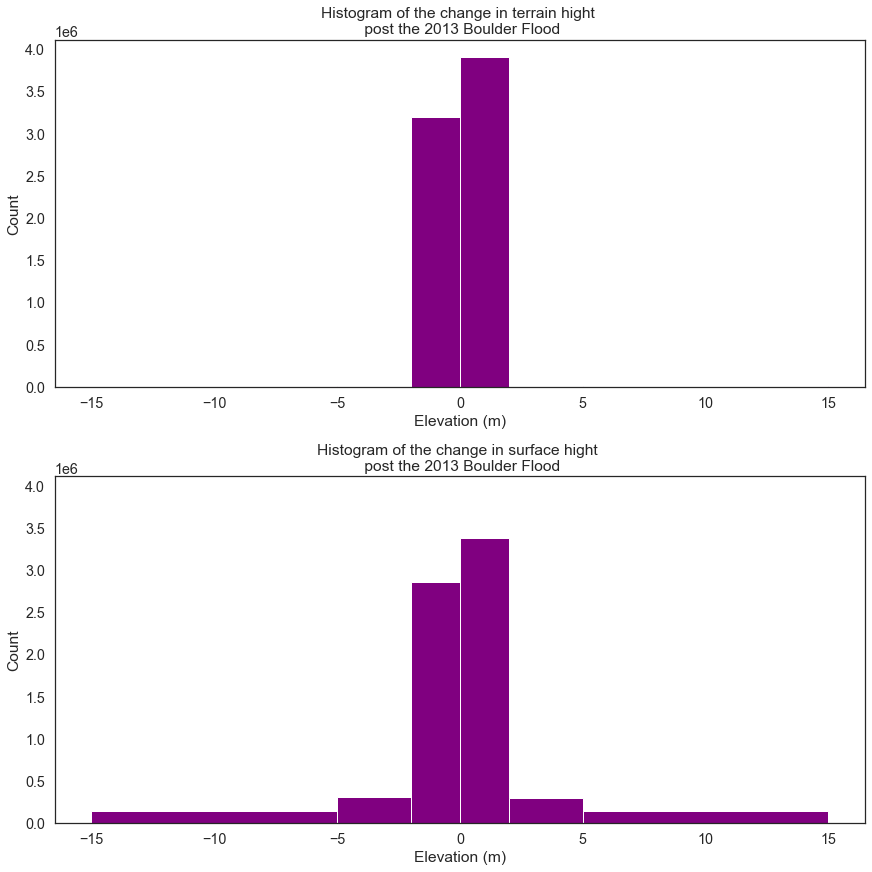

In [22]:
# IMPORTANT: Do not use plt.show in this cell. Add your code for plot 4 here

#Define bins
plot_bins=[-15, -5, -2, 0 , 2, 5, 15]

dtm_change = lidar_dtm_post - lidar_dtm_pre
dsm_change = lidar_dsm_post - lidar_dsm_pre

# Plot a histogram
fig, ax = plt.subplots(nrows=2, 
                       ncols=1, 
                       figsize=(12, 12), 
                       sharey=True,
                       constrained_layout=True)


dtm_change.plot.hist(ax=ax[0],
                     bins=plot_bins, 
                     color = 'purple')

ax[0].set(xlabel="Elevation (m)",
          ylabel="Count",
          title="Histogram of the change in terrain hight \n post the 2013 Boulder Flood")

dsm_change.plot.hist(ax=ax[1],
                     bins=plot_bins, 
                     color = 'purple')

ax[1].set(xlabel="Elevation (m)",
          ylabel="Count",
          title="Histogram of the change in surface hight \n post the 2013 Boulder Flood")

### DO NOT REMOVE LINE BELOW ###
plot04_histogram_diff = nb.convert_axes(plt, which_axes="all")

In [23]:
# DO NOT MODIFY THIS CELL
# Visible test that there are two plots stacked vertically and of type bar / hist
axes_1_position = plot04_histogram_diff[0].get_position().corners()[:, 0]
axes_2_position = plot04_histogram_diff[1].get_position().corners()[:, 0]


hist_plot_4_dsm = mpc.PlotTester(plot04_histogram_diff[0])
hist_plot_4_dtm = mpc.PlotTester(plot04_histogram_diff[1])

visible_results = []

plot_type_test_1 = ag.run_test(hist_plot_4_dsm.assert_plot_type,
                               points=1,
                               plot_type='bar',
                               correct_message="\u2705 Your top plot is a bar plot!",
                               error_message="\u274C Oops, I was expecting a bar plot.")

plot_type_test_2 = ag.run_test(hist_plot_4_dtm.assert_plot_type,
                               points=1,
                               plot_type='bar',
                               correct_message="\u2705 Your bottom plot is a bar plot!",
                               error_message="\u274C Oops, I was expecting a bar plot.")

visible_results.extend([plot_type_test_1, plot_type_test_2])

if np.array_equal(axes_1_position, axes_2_position):
    print("\u2705 Arrays are stacked vertically!")
else:
    print("\u274C Arrays are not stacked vertically.")

ag.output_results(visible_results)

✅ Arrays are stacked vertically!
Results for test 'assert_plot_type':
 Pass! ✅ Your top plot is a bar plot! (1 points)
Results for test 'assert_plot_type':
 Pass! ✅ Your bottom plot is a bar plot! (1 points)


2

In [24]:
# DO NOT MODIFY THIS CELL

YOUR ANSWER HERE

###  Thought Challenge For Challenge 6 Plot

* Look at the histograms for the difference DSM compared to the DTM. What differences do you notice in the DSM difference values vs the DTM difference values?  
* What may be causing those differences between the two datasets

Add your answer below using markdown 

1. There are no observation in the different DTM models outside 2m of elevation (+ & -), where as for the DSM there are observations up to 15m different in elevation (+ & -)

2. As the DSM data includes objects that sit above the earths surface, such as trees, building and other objects, we could suggest that maybe the wider dynamics in terrain change are driven by these surface objects moving during the flood. There would be less movement in the overall earth surface high (DTM) which excludes the objects observed in the DSM. For example, if the flood caused a 10 meter building to collapse, this would be captured in the DSM not the DTM

## Pep 8, Spelling and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook (4 points)
2. Spelling and grammar are considered in your written responses above (4 points)
3. The notebook runs from top to bottom without any editing (it is reproducible) - 4 points